In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt 
import seaborn as sns
import scipy as sp
!pip install mlxtend
from mlxtend.frequent_patterns import association_rules,apriori
from mlxtend.preprocessing import TransactionEncoder
import warnings
warnings.filterwarnings('ignore')

## Problem Statement  
Prepare rules for the all the data sets  1) Try different values of support and confidence. Observe the change in number of rules for different support,confidence values  2) Change the minimum length in apriori algorithm  3) Visulize the obtained rules using different plots 

In [2]:
df = pd.read_csv("E:\Data Science\Assignments\Association Rules\my_movies.csv")

In [3]:
df.head(10)

,V1,V2,V3,V4,V5,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,Sixth Sense,LOTR1,Harry Potter1,Green Mile,LOTR2,1,0,1,1,0,1,0,0,0,1
1,Gladiator,Patriot,Braveheart,NaN,NaN,0,1,0,0,1,0,0,0,1,0
2,LOTR1,LOTR2,NaN,NaN,NaN,0,0,1,0,0,1,0,0,0,0
3,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
4,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
5,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
6,Harry Potter1,Harry Potter2,NaN,NaN,NaN,0,0,0,1,0,0,1,0,0,0
7,Gladiator,Patriot,NaN,NaN,NaN,0,1,0,0,1,0,0,0,0,0
8,Gladiator,Patriot,Sixth Sense,NaN,NaN,1,1,0,0,1,0,0,0,0,0
9,Sixth Sense,LOTR,Gladiator,Green Mile,NaN,1,1,0,0,0,0,0,1,0,1


In [4]:
df1 = df.iloc[:,5:]

In [5]:
df1.head()

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
0,1,0,1,1,0,1,0,0,0,1
1,0,1,0,0,1,0,0,0,1,0
2,0,0,1,0,0,1,0,0,0,0
3,1,1,0,0,1,0,0,0,0,0
4,1,1,0,0,1,0,0,0,0,0


In [6]:
df1.describe()

,Sixth Sense,Gladiator,LOTR1,Harry Potter1,Patriot,LOTR2,Harry Potter2,LOTR,Braveheart,Green Mile
count,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000,10.000000
mean,0.600000,0.700000,0.200000,0.200000,0.600000,0.200000,0.100000,0.100000,0.100000,0.200000
std,0.516398,0.483046,0.421637,0.421637,0.516398,0.421637,0.316228,0.316228,0.316228,0.421637
min,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
25%,0.000000,0.250000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000,0.000000
50%,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
75%,1.000000,1.000000,0.000000,0.000000,1.000000,0.000000,0.000000,0.000000,0.000000,0.000000
max,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000,1.000000


In [7]:
df1.isnull().sum()

Sixth Sense      0
Gladiator        0
LOTR1            0
Harry Potter1    0
Patriot          0
LOTR2            0
Harry Potter2    0
LOTR             0
Braveheart       0
Green Mile       0
dtype: int64

In [8]:
df1.shape

(10, 10)

In [9]:
item_sets = {}

In [10]:
te = TransactionEncoder()

In [11]:
te_ary = te.fit(df1).transform(df1)

In [12]:
ap = pd.DataFrame(te_ary, columns=te.columns_)

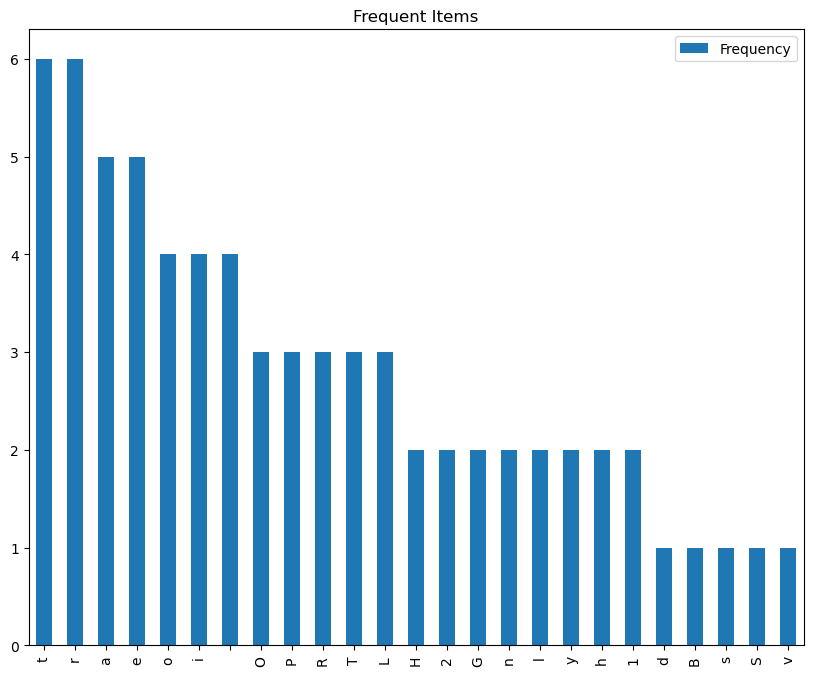

In [13]:
ap.sum().to_frame('Frequency').sort_values('Frequency',ascending=False)[:25].plot(kind='bar',figsize=(10,8),
                                                                                  title="Frequent Items")
plt.show()

## Apriori Algorithm 

In [14]:
ap0_5 = {}
ap1 = {}
ap5 = {}
ap1_0 = {}

In [15]:
confidence = [0.1,0.2,0.3,0.4,0.5,0.6,0.7,0.8,0.9]

In [16]:
def gen_rules(df,confidence,support):
    ap = {}
    for i in confidence:
        ap_i =apriori(df1,support,True)
        rule= association_rules(ap_i,min_threshold=i)
        ap[i] = len(rule.antecedents)
    return pd.Series(ap).to_frame("Support: %s"%support)

In [17]:
conf = []

In [18]:
for i in [0.005,0.001,0.003,0.007]:
    ap_i = gen_rules(ap,confidence=confidence,support=i)
    conf.append(ap_i)

In [19]:
all_conf = pd.concat(conf,axis=1)

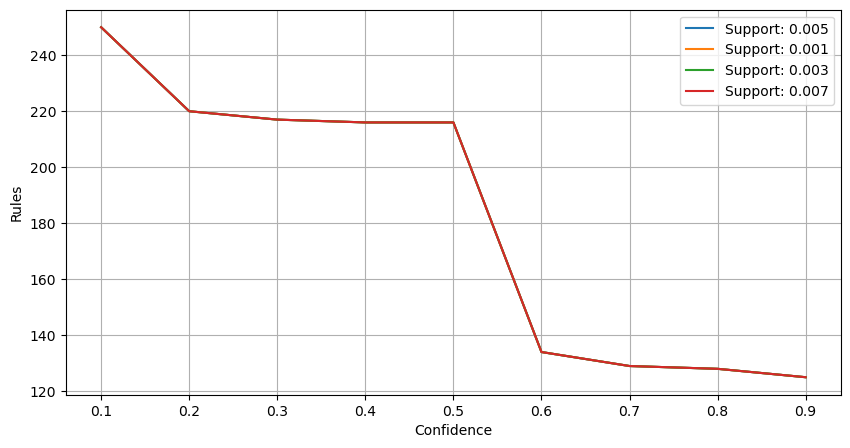

In [20]:
all_conf.plot(figsize=(10,5),grid=True)
plt.ylabel('Rules')
plt.xlabel('Confidence')
plt.show()

In [21]:
#Lower the confidence level higher is the no. of rules.
#Higher the support, lower is the no. of rules.

In [22]:
ap_final =  apriori(ap,0.005,True)

In [23]:
rulesfinal = association_rules(ap_final,min_threshold=.4,support_only=False)

In [24]:
rulesfinal[rulesfinal['confidence'] > 0.5]

,antecedents,consequents,antecedent support,consequent support,support,confidence,lift,leverage,conviction,zhangs_metric
3,(H),( ),0.2,0.4,0.2,1.000000,2.500000,0.12,inf,0.750000
5,(M),( ),0.1,0.4,0.1,1.000000,2.500000,0.06,inf,0.666667
6,(P),( ),0.3,0.4,0.2,0.666667,1.666667,0.08,1.8,0.571429
8,(S),( ),0.1,0.4,0.1,1.000000,2.500000,0.06,inf,0.666667
11,(e),( ),0.5,0.4,0.4,0.800000,2.000000,0.20,3.0,1.000000
...,...,...,...,...,...,...,...,...,...,...
113708,"( , 2)","(a, t, H, P, y, o, e, r)",0.1,0.2,0.1,1.000000,5.000000,0.08,inf,0.888889
113709,"(y, 2)","(a, t, H, P, , o, e, r)",0.1,0.2,0.1,1.000000,5.000000,0.08,inf,0.888889
113710,"(2, o)","(a, t, H, P, , y, e, r)",0.1,0.2,0.1,1.000000,5.000000,0.08,inf,0.888889
113711,"(e, 2)","(a, t, H, P, , y, o, r)",0.1,0.2,0.1,1.000000,5.000000,0.08,inf,0.888889


In [25]:
support = rulesfinal["support"]
confidence =  rulesfinal["confidence"]
lift = rulesfinal["lift"]

Text(0.5, 0, 'lift')

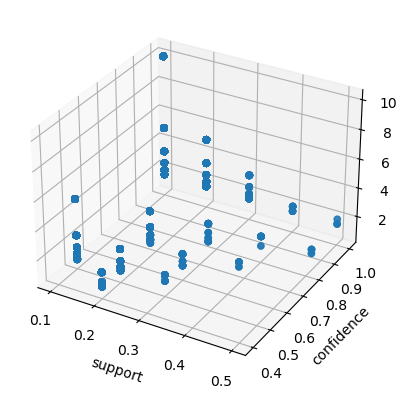

In [26]:
fig1 = plt.figure()
ax1 = fig1.add_subplot(111, projection = '3d')
ax1.scatter(support,confidence,lift)
ax1.set_xlabel("support")
ax1.set_ylabel("confidence")
ax1.set_zlabel("lift")

Text(0, 0.5, 'confidence')

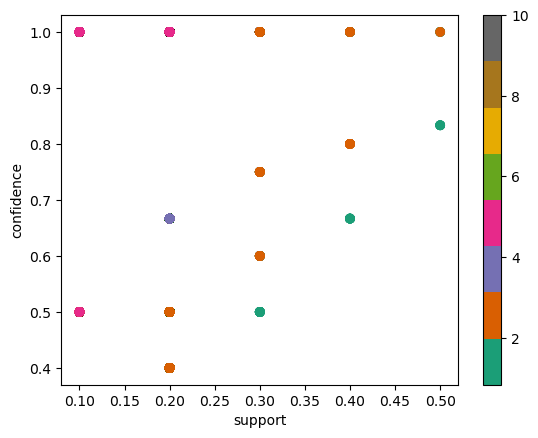

In [27]:
plt.scatter(support,confidence, c =lift, cmap = 'Dark2')
plt.colorbar()
plt.xlabel("support");plt.ylabel("confidence")